In [1]:
%matplotlib inline

In [2]:
# -*- coding: utf-8 -*-

<div class="document" id="deconvolution-of-lena">
<h1 class="title">Deconvolution of Lena</h1>
<p>In this example, we deconvolve a noisy version of Lena using Wiener
and unsupervised Wiener algorithms. This algorithms are based on
linear models that can't restore sharp edge as much as non-linear
methods (like TV restoration) but are much faster.</p>
<div class="section" id="wiener-filter">
<h1>Wiener filter</h1>
<p>The inverse filter based on the PSF (Point Spread Function),
the prior regularisation (penalisation of high frequency) and the
tradeoff between the data and prior adequacy. The regularization
parameter must be hand tuned.</p>
</div>
<div class="section" id="unsupervised-wiener">
<h1>Unsupervised Wiener</h1>
<p>This algorithm has a self-tuned regularisation parameters based on
data learning. This is not common and based on the following
publication. The algorithm is based on a iterative Gibbs sampler that
draw alternatively samples of posterior conditionnal law of the image,
the noise power and the image frequency power.</p>
<table class="docutils footnote" frame="void" id="id1" rules="none">
<colgroup><col class="label" /><col /></colgroup>
<tbody valign="top">
<tr><td class="label">[1]</td><td>François Orieux, Jean-François Giovannelli, and Thomas
Rodet, &quot;Bayesian estimation of regularization and point
spread function parameters for Wiener-Hunt deconvolution&quot;,
J. Opt. Soc. Am. A 27, 1593-1607 (2010)</td></tr>
</tbody>
</table>
</div>
</div>


/home/guillaume/python3/lib/python3.3/site-packages/matplotlib-1.4.x-py3.3-linux-x86_64.egg/matplotlib/figure.py:1617: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


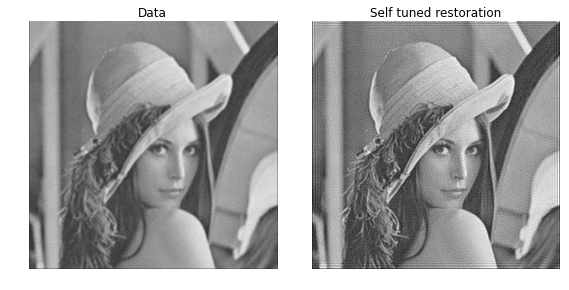

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration

lena = color.rgb2gray(data.lena())
from scipy.signal import convolve2d as conv2
psf = np.ones((5, 5)) / 25
lena = conv2(lena, psf, 'same')
lena += 0.1 * lena.std() * np.random.standard_normal(lena.shape)

deconvolved, _ = restoration.unsupervised_wiener(lena, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

plt.gray()

ax[0].imshow(lena, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)

plt.show()

'__main__'